In [1]:
import numpy as np
import pandas as pd
# import scipy as sp
import glob
import matplotlib.pyplot as plt

In [2]:
dt = 0.01                              # Step-size of the SDE solver 
delta_t = 0.1                          # Step-size of the temporally coarse-grained path
batch = 400                            # Batch size 
sec_length = 400                       # Length of the input sequence 

#### SDE solver (EM scheme) 
Time = 5*delta_t*sec_length
print(Time)
length=int(Time/dt)+1                  # tpts: Total time points for simulation 20001
t = np.linspace(0,Time,length)         # define time axis
gap=int(delta_t/dt)
t_store=t[0:-1:gap]
t_store.size

200.0


2000

In [3]:
training = pd.read_csv("res319.csv", sep='\t',header=1)
training

0  500  0.1
0        0.01  488   12
1        0.02  484   16
2        0.03  486   14
3        0.04  490   10
4        0.05  486   14
...       ...  ...  ...
19996  199.97  470   30
19997  199.98  460   40
19998  199.99  456   44
19999  200.00  456   44
20000  200.01  454   46

[20001 rows x 3 columns]

In [4]:
path ='.'
filenames = glob.glob(path + "/*.csv")
# creating empty list
dataFrames = list()
# iterating through CSV file in current directory
for filename in filenames:
    dataFrames.append(pd.read_csv(filename, header=1, sep='\t'))
    print(filename)
# Concatenate all data into one DataFrame
merged_frame = pd.concat(dataFrames,axis=1)
# print merged dataframe
print(merged_frame)

./res319.csv
./res325.csv
./res331.csv
./res127.csv
./res133.csv
./res75.csv
./res61.csv
./res49.csv
./res292.csv
./res286.csv
./res4.csv
./res279.csv
./res251.csv
./res245.csv
./res244.csv
./res250.csv
./res278.csv
./res5.csv
./res287.csv
./res293.csv
./res48.csv
./res60.csv
./res74.csv
./res132.csv
./res126.csv
./res330.csv
./res324.csv
./res318.csv
./res332.csv
./res326.csv
./res118.csv
./res130.csv
./res124.csv
./res89.csv
./res62.csv
./res76.csv
./res285.csv
./res291.csv
./res7.csv
./res246.csv
./res252.csv
./res253.csv
./res247.csv
./res6.csv
./res290.csv
./res284.csv
./res77.csv
./res63.csv
./res88.csv
./res125.csv
./res131.csv
./res119.csv
./res327.csv
./res333.csv
./res337.csv
./res323.csv
./res135.csv
./res121.csv
./res109.csv
./res98.csv
./res67.csv
./res73.csv
./res280.csv
./res294.csv
./res243.csv
./res257.csv
./res2.csv
./res3.csv
./res256.csv
./res242.csv
./res295.csv
./res281.csv
./res72.csv
./res66.csv
./res99.csv
./res108.csv
./res120.csv
./res134.csv
./res322.csv
./r

In [5]:
data = merged_frame['0.1'].values
data = data/500 # occupied coverage

In [6]:
cg_data=data[9::gap,:]

In [7]:
cg_data.size/batch

2000.0

In [8]:
Toss = int(t_store.size/4)
cg_data = cg_data[Toss-1:-1,:]

In [9]:
print(cg_data.shape)

(1500, 400)


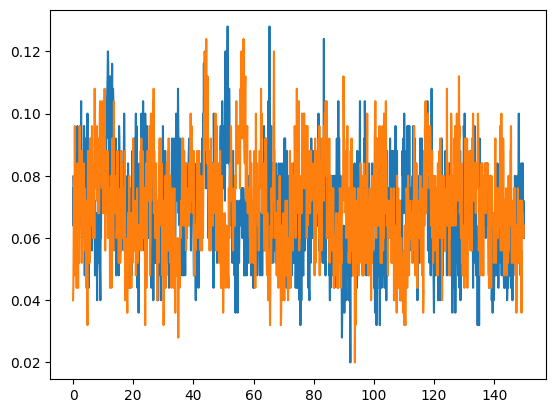

In [10]:
plt.plot(t_store[Toss:]-t_store[Toss],cg_data[:,0])
plt.plot(t_store[Toss:]-t_store[Toss],cg_data[:,1])

In [11]:
#### Constructing the sample traj for SINN learning 
ini=np.random.randn(sec_length,batch)
Traj=cg_data[0:sec_length,:]
T=np.arange(len(Traj[:,1]))*delta_t
x=np.linspace(-5,5,sec_length)
print(ini.shape, Traj.shape)

(400, 400) (400, 400)


In [ ]:
# Reformulating data into Torch tensors 
# Input of SINN should be of the form (seq_len, batch, input_size)

ini = np.random.randn(2*sec_length,batch).astype(np.float32) 
input = torch.from_numpy(ini.reshape(2*sec_length, batch,1)).to(device)
batch_validation = batch
val_set = torch.normal(0.0, 1.0, (2*sec_length, batch_validation, 1), device=device)


Traj = Traj.astype(np.float32) 
target = torch.from_numpy(Traj.reshape(sec_length, batch,1)).to(device)
print('The torch input size is', input.size(), input.dtype)
print('The torch validation size is', val_set.size(), val_set.dtype)
print('The torch target size is', target.size(), target.dtype)